<h1 align="center"> Assignment - 3 (Machine Learning) </h1>

<h2 align="left"> Polynomial Regression and LASSO </h2> 
<h4 align="right" > 
    Author: <a href="https://jimut123.github.io/">Jimut Bahan Pal </a>
</h4> 

#### As usual, importing the necessary libraries

In [1]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
from sklearn import linear_model
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
sns.set()

## Part - 1

#### Generating artificial data from a second-order polynomial equation with added Gaussian noise

$$y = x^2 - 4x + \epsilon$$ where $\epsilon$ is the Gaussian noise.

In [2]:
# creation of Artificial data

# set the seed timer stuff
np.random.seed(4)
X = np.random.rand(50,1)*20  # 50 random numbers chosen from the interval [0,20) <1D input data>
epsilon = np.random.normal(0,8,(50,1))  # noise associated with each output data

y = X*X - 4*X + epsilon  # corresponding output data

# just a auxiallary data for extra plotting and stuffs, not to be confused with the original 
# train and test dataset
ploy_func_x = X[:-10, :]                     # this is the training data for X
ploy_func_y_full = X*X - 4*X
poly_func_y = ploy_func_y_full[:-10, :]      # this is the training data for y

poly_func_x_test = X[-10:, :]                # this is the testing data for X
poly_func_y_test = ploy_func_y_full[-10:, :] # this is the testing data for y

## Part - 2

#### Segregating the data into training and test datasets

In [3]:

# make the train test split
# training data

X_train = X[ :-10, : ]
y_train = y[ :-10, : ]


# test data

X_test = X[ -10: , : ]
y_test = y[ -10: , : ]

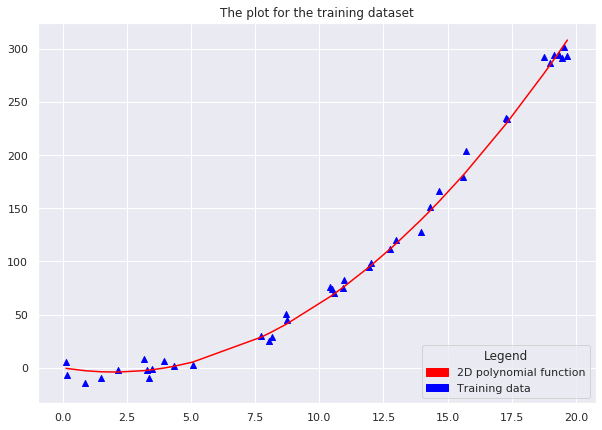

In [4]:
#fig = plt.figure(figsize=(16,9))
# just for the visualisation of the original function with the training data
fig, ax = plt.subplots(figsize=(10,7))
ax.set_title('The plot for the training dataset')

#handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
new_X, new_y = zip(*sorted(zip(ploy_func_x, poly_func_y))) # sort values for plotting

test_new_X, test_new_y = zip(*sorted(zip(poly_func_x_test, poly_func_y_test))) # sort values for plotting

plt.plot(new_X, new_y,color='red')
plt.scatter(X_train,y_train, marker='^',color='blue')

red_patch = mpatches.Patch(color='red', label='2D polynomial function')
blue_patch = mpatches.Patch(color='blue', label='Training data')
plt.legend(handles=[red_patch,blue_patch],loc="lower right", title="Legend")


ax.grid(True)

plt.show()

## Part - 3

#### Modeling the data using a tenth-order polynomial with Linear Regression (basis functions approach).

In [5]:

# creating the polynomial linear regression stuffs
polynomial_features= PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(X_train)

# creating the test dataset in the form by fit_transform
x_poly_test = polynomial_features.fit_transform(X_test)

model = LinearRegression()
# the actual training
model.fit(x_poly, y_train)
# predicting the test dataset
y_poly_pred = model.predict(x_poly_test)



## Part - 4

#### Computing the root mean squared error (RMSE) on the test dataset

In [6]:
# calculating the RMSE and R2 score on the test dataset
rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))
r2 = r2_score(y_test,y_poly_pred)

print("Root Mean Squared Error : ",rmse)
print("R2 score : ",r2)

Root Mean Squared Error :  12.152467512217232
R2 score :  0.9451922229176698


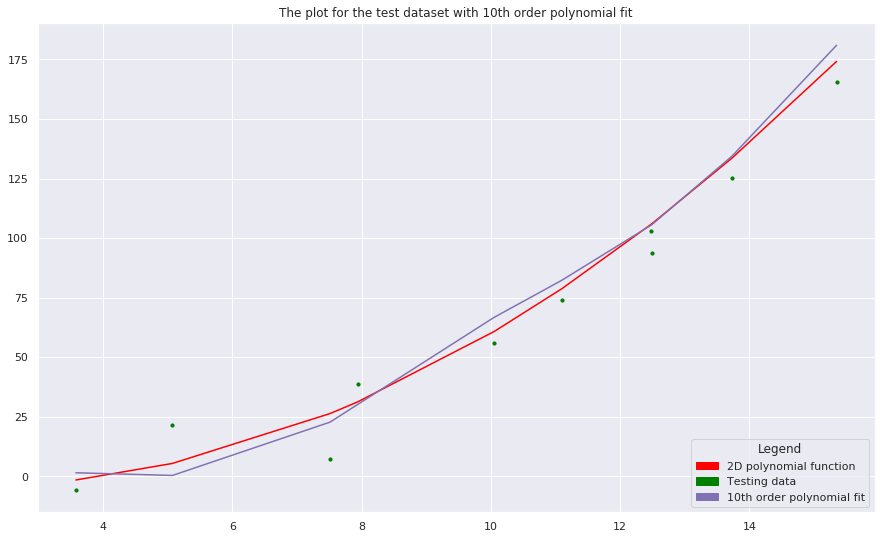

In [7]:

# plotting the dataset with the poly-Linear Regression fit

fig, ax = plt.subplots(figsize=(15,9))
ax.set_title('The plot for the test dataset with 10th order polynomial fit')
#plt.scatter(X_train, y_train, s=10)
# sort the values of x before line plot
#sort_axis = operator.itemgetter(0)

plt.scatter(X_test, y_test, s=10,color='green')

#new_X, new_y = zip(*sorted(zip(ploy_func_x, poly_func_y))) # sort values for plotting
plt.plot(test_new_X, test_new_y,color='red')
#plt.scatter(X_train,y_train, marker='^',color='blue')


sorted_zip = sorted(zip(X_test,y_poly_pred))#, key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')

tenthp_patch = mpatches.Patch(color='m', label='10th order polynomial fit')
red_patch = mpatches.Patch(color='red', label='2D polynomial function')
blue_patch = mpatches.Patch(color='green', label='Testing data')
plt.legend(handles=[red_patch,blue_patch,tenthp_patch],loc="lower right", title="Legend")
ax.grid(True)
plt.show()

## Part - 5

#### Now performing the regularization using LASSO model. 

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 692.2438544202428, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(


Root Mean Squared Error for LASSO :  11.762489435681072
R2 score for LASSO :  0.9486533938436397


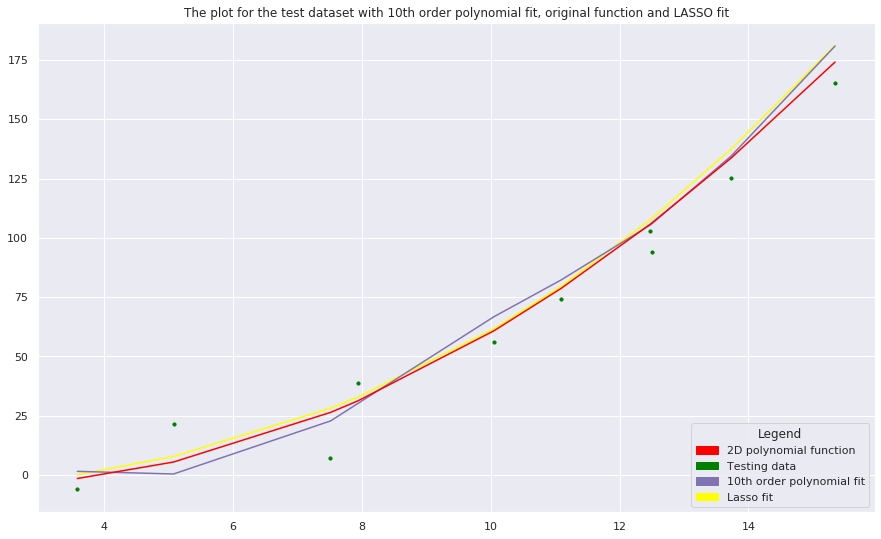

In [8]:
lasso_reg = linear_model.Lasso(alpha=0.0001, fit_intercept=True, normalize=True);
#fit_intercept to center the outputs y;
#normalize to standardize the features



lasso_reg.fit(x_poly, y_train)
#lasso_reg.fit(X_train, y_train)
y_poly_pred_lasso = lasso_reg.predict(x_poly_test)
#y_poly_pred_lasso = lasso_reg.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test,y_poly_pred_lasso))
r2_lasso = r2_score(y_test,y_poly_pred_lasso)

print("Root Mean Squared Error for LASSO : ",rmse_lasso)
print("R2 score for LASSO : ",r2_lasso)


polynomial_features= PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(X_train)

x_poly_test = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly_test)



fig, ax = plt.subplots(figsize=(15,9))
ax.set_title('The plot for the test dataset with 10th order polynomial fit, original function and LASSO fit')


sorted_zip = sorted(zip(X_test,y_poly_pred_lasso))#, key=sort_axis)
x_lasso, y_poly_pred_lasso = zip(*sorted_zip)
plt.plot(x_lasso, y_poly_pred_lasso, color='yellow')


sorted_zip = sorted(zip(X_test,y_poly_pred))
x_, y_poly_pred = zip(*sorted_zip)
plt.plot(x_, y_poly_pred, color='m')


plt.scatter(X_test, y_test, s=10,color='green')


#new_X, new_y = zip(*sorted(zip(ploy_func_x, poly_func_y))) # sort values for plotting
plt.plot(test_new_X, test_new_y,color='red')
#plt.scatter(X_train,y_train, marker='^',color='blue')



tenthp_patch = mpatches.Patch(color='m', label='10th order polynomial fit')
red_patch = mpatches.Patch(color='red', label='2D polynomial function')
blue_patch = mpatches.Patch(color='green', label='Testing data')
yellow_patch = mpatches.Patch(color='yellow', label='Lasso fit')
plt.legend(handles=[red_patch,blue_patch,tenthp_patch,yellow_patch],loc="lower right", title="Legend")
ax.grid(True)
plt.show()


#### Varying the regularization coefficient (alpha) and plotting the variation of RMSE on the test dataset versus alpha. Take alpha to be positive.

In [32]:
aplha_vs_rmse = []
alpha_var = 10e-9
factor_x = 10e-9
while alpha_var<10e-1:
    #print(alpha)
    lasso_reg = linear_model.Lasso(alpha=alpha_var, fit_intercept=True, normalize=True);
    #fit_intercept to center the outputs y;
    #normalize to standardize the features
    lasso_reg.fit(x_poly, y_train)
    y_poly_pred_lasso = lasso_reg.predict(x_poly_test)
    rmse_lasso = np.sqrt(mean_squared_error(y_test,y_poly_pred_lasso))
    aplha_vs_rmse.append([alpha_var,rmse_lasso])
    alpha_var = alpha_var + factor_x
    factor_x += alpha_var *factor_x
    #r2_lasso = r2_score(y_test,y_poly_pred_lasso)
    

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 800.3150591402136, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 800.3048546708752, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 800.294650084051, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 799.2224940348195, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 799.2122764069273, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 799.2020586504797, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 798.2000765386773, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 798.1898455318136, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 798.1796143859927, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 797.0943025322284, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 797.0840559066736, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 797.0738091308199, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 795.9354574483427, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 795.9251924898891, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 795.9149280473233, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 794.9390498206885, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 794.9287693100669, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 794.9184886269597, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 794.0233956475638, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 794.0130993642755, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 794.0028028990248, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 792.9000002053106, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 792.8896834413753, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 792.8793664837451, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 791.7639699831574, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 791.7536312601935, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 791.7432923316283, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 790.6254506364259, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 790.6150886349187, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 790.6047264157716, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 789.4635292887866, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 789.4531422491057, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 789.4427549794616, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 788.2778940912805, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 788.2674800927111, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 788.2570658514813, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 787.068221232188, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 787.05777833459, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 787.0473351812742, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want 

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 786.3052017342848, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 786.2947398668463, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 786.2842777354531, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 785.4883726645888, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 785.4778898626822, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 785.4674067229976, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 784.4807592768359, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 784.4702497498948, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 784.4597399390001, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 783.3229825371513, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 783.3124410797122, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 783.3018993255657, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 782.1616155272104, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 782.1510407215363, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 782.1404656061843, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781.1768176285838, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781.1662135128303, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781.155609076303, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 780.0084068329377, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 779.9977667170757, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 779.9871262596032, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 778.8573193387197, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 778.8466424398715, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 778.8359651938484, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 777.852157885079, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 777.8414478136303, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 777.8307373833812, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 776.6826260349399, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 776.6718761244692, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 776.6611258415867, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 775.422329469786, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 775.4115351311019, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 775.4007404051603, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 774.1675689364728, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 774.1567288239895, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 774.1458883093256, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 772.9618377039374, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 772.9509521565336, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 772.9400661924091, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 771.7400498907266, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 771.7291168587834, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 771.7181833952798, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 770.4689140999945, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 770.457930113844, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 770.4469456804854, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 769.1697006962478, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 769.1586630054112, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 769.147624851145, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 767.9083951293118, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 767.8973032762607, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 767.8862131135504, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 766.6074309401474, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 766.5962825007811, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 766.5851335654867, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765.3781225058389, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765.3669213736414, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765.3557197310594, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 764.1426282910913, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 764.131367271977, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 764.1201057247494, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 762.8214959231418, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 762.8101753897313, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 762.7988543124152, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 761.4929085669387, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 761.4815199094477, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 761.4701306883987, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 760.2253369764492, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 760.2138848465133, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 760.202432135717, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 758.9505999340257, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 758.9390823785645, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 758.9275642246162, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 757.5874215319463, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 757.575832271871, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 757.5642423941833, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 756.2039553545884, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 756.1922914549009, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 756.1806269178463, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 754.8702068271085, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 754.8584692206726, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 754.8467309576681, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 753.492440812324, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 753.4806252305316, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 753.4688089719028, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 752.1887279740865, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 752.176836922032, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 752.1649451736548, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 750.8645828363767, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 750.8526134163061, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 750.8406432798569, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 749.483472143719, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 749.471419184222, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 749.4593654871479, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 748.104700074871, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 748.09256184286, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 748.0804228517059, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want 

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 746.6794492860744, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 746.6672209872108, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 746.6549919065858, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 745.317362765302, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 745.3050465177337, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 745.2927294664676, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 743.895828079713, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 743.8834181430666, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 743.8710073793562, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 742.5258136093255, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 742.5133114938149, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 742.5008085284774, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 741.1204187104255, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 741.1078201646625, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 741.0952207452042, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 739.7166844959521, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 739.7039888972054, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 739.69130022463, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 738.1995965232928, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 738.1867913949745, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 738.1739853422935, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 736.708171495617, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 736.6952674929832, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 736.6823589327123, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 735.2169201399363, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 735.2038954852643, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 735.1908698526286, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 733.6865708232334, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 733.6734301205339, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 733.6602884118707, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 732.1821200278428, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 732.168863140013, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 732.1556052174745, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 730.6108602110098, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 730.5974795819262, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 730.5840978881924, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 729.0652171355817, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 729.0517243834018, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 729.0382305413011, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 727.4915550395826, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 727.4779216156855, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 727.4642870657399, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 725.8890399263065, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 725.8752730062763, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 725.8615049280294, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 724.3539351852368, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 724.3400379598468, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 724.3261395442319, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 722.8043511008523, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 722.7903200851972, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 722.7762878466635, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 721.1545240895122, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 721.1403480194422, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 721.1261754856806, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 719.4876790533214, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 719.4733537954752, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 719.4590272429919, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 717.8899997401525, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 717.8755289716166, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 717.8610568729584, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 716.1587546655294, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 716.1441233632121, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 716.1294906913599, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 714.4379406845561, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 714.4231469858413, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 714.4083518777911, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 712.7277541936633, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 712.7128131344231, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 712.6978706321311, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 710.9680242338798, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 710.9528945313023, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 710.937763336892, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 709.2646070983646, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 709.2493078772632, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 709.2340071219128, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 707.5573513133828, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 707.541898157929, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 707.5264434327796, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 705.768039417713, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 705.7523838264719, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 705.7367266123915, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 704.0049876989568, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 703.9891479615832, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 703.973306555024, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 702.1889523976308, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 702.1729402323197, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 702.1569263575379, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 700.3017315065914, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 700.2854951372026, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 700.2692569988827, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 698.3576888929857, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 698.3412390261502, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 698.3247873362158, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 696.4545431663483, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 696.437880762929, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 696.4212164822017, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 694.54336428042, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 694.5265080088467, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 694.50964981368, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want t

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 692.589969495265, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 692.5728647071444, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 692.5557579280365, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 690.6104758225615, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 690.5931388841001, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 690.575799894392, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 688.5335981131094, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 688.5160135388345, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 688.4984268490441, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 686.5159587010528, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 686.498155644358, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 686.4803504184789, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 684.4516657872006, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 684.4335823564533, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 684.4154966789594, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 682.2846566746654, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 682.2663019172878, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 682.2479448412073, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 680.1407716035943, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 680.1221439744147, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 680.1035139537693, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 677.9080889777715, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 677.8891724944104, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 677.8702535418082, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 675.7748994774491, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 675.7557025300097, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 675.7365030375206, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 673.6288414866908, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 673.6093796487467, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 673.5899246634574, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 671.371882379195, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 671.3520926470773, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 671.3323002075875, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 669.0591516580062, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 669.0390431707582, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 669.0189318879708, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 666.7292621822029, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 666.708827374155, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 666.6883896796401, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 664.3405098366962, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 664.3197350672484, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 664.2989573158818, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 661.8483772314057, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 661.8272431099311, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 661.8061059052756, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 659.4845950609799, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 659.4631124164232, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 659.4416265884262, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 656.9942690635753, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 656.9724146405401, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 656.9505569272528, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 654.5049886719942, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 654.482757691268, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 654.4605223360535, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 651.9724803726979, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 651.9498582931046, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 651.9272326991686, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 649.3029890957516, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 649.2799491448151, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 649.2569055562928, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 646.6776599956, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 646.6542024805701, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 646.6307412033493, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want 

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 643.9088925230951, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 643.8849891219896, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 643.8610818253665, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 641.111215637037, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 641.0868511236122, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 641.062482573864, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 638.1599267906162, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 638.1350694500329, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 638.1102079218905, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 635.249942776012, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 635.2245932705254, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 635.1992394255058, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 632.2818613596637, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 632.2560490400092, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 632.2302322428025, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 629.2270112432925, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 629.2006648089241, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 629.1743137283884, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 626.1086040594713, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 626.0816510778052, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 626.0546932497538, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 622.9511141352516, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 622.9235867792992, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 622.8960543912339, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 619.7540704126602, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 619.7259540406044, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 619.6978324438065, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 616.4023868457415, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 616.3737203975388, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 616.3450485551516, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 613.0929873402358, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 613.0636130838365, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 613.0342331856855, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 609.7397631010448, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 609.7097398339224, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 609.6797107064034, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 606.3733397801054, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 606.3426571718401, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 606.3119684794399, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 602.9330655516175, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 602.9017613246588, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 602.870450808636, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 599.446350471794, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 599.4142696082226, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 599.3821821751983, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 595.7817927545422, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 595.748958723624, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 595.7161466921764, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591.9976517783282, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591.9640859080841, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591.9304476612417, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 588.2357924696832, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 588.205348025881, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 588.1748981608483, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 585.3342147129599, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 585.3032517623711, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 585.2722832251005, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 583.0410305511074, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 583.0096530822062, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 582.9782698934999, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 580.2700487318752, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 580.238557115821, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 580.2070597980113, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 576.7114882688447, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 576.6789773917578, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 576.6464604317631, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 573.5099298256864, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 573.4771976396098, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 573.4444593512443, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 570.1817671390854, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 570.148410406863, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 570.1150473676013, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 566.4129133907759, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 566.3788399258925, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 566.3447599171559, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 562.3850436934268, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 562.3497389750798, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 562.3144272331187, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 558.9807912496508, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 558.9454282558487, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 558.9100583092184, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 555.3348300169666, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 555.2981068654185, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 555.2613762014989, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 551.4541330380259, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 551.4167508664932, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 551.3797121993198, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 547.3081296943961, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 547.2697430701244, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 547.2313483489318, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 543.6471157636989, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 543.6084724230346, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 543.5698209719229, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 539.9127390869423, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 539.8728219958359, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 539.8328962672462, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 535.8602869839428, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 535.8199887274277, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 535.7796817706163, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 532.7986980959278, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 532.7671845284378, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 532.7356662860539, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 529.488813723814, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 529.456799740464, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 529.4247809424255, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526.4138256278052, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526.3800645013725, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526.346297915503, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 522.7929027856271, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 522.7585483796069, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 522.7241883371986, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 519.1713453836306, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 519.136391406724, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 519.1014316148267, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 515.3826223021274, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 515.3470296059234, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 515.3114309013042, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511.4452112696878, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511.40894750199936, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511.37267752163206, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might 

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 507.6694499174776, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 507.6339729231831, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 507.5984901175814, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 504.2829031698295, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 504.24539040330416, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 504.207871039582, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 500.29844827307664, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 500.26173584630624, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 500.2250172425828, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might 

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496.2969325482278, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496.2595365935406, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496.2221342580495, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492.7047639544268, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492.6667449831899, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492.6287194434592, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488.8693693006904, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488.8306777842322, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488.79197949522506, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might w

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 485.0231485792348, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484.98211469261616, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484.9410730960381, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might w

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.749108045936, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.70877387866324, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.66843241411897, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might w

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 476.93545248646274, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 476.89461032727775, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 476.8537607340357, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might 

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 473.60407012762954, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 473.56017745575923, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 473.51627605503415, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468.9296372871517, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468.8854855837249, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468.8413251533933, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464.97218557629833, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464.9288946412955, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464.8855954784733, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might w

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 462.18313004657057, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 462.1395165122672, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 462.0958946725328, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might w

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459.2141721071319, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459.1673354920345, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459.120489151445, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456.1904745235798, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456.1456996087266, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456.1009160180922, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 452.02737916890294, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451.97962035186225, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451.93125587340563, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 447.1994375953653, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 447.15288413850436, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 447.1063214306882, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might w

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 442.547343410612, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 442.49985126631816, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 442.45234956526997, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might w

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437.31864672188, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437.26757336437436, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437.21600604109085, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 431.8629480172346, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 431.81016913339937, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 431.75737844517204, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might 

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 426.37361621219077, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 426.3227734800174, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 426.2719200837602, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might w

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 420.8105840358414, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 420.7561947613129, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 420.70179324342485, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might w

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415.42839563356426, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415.37520759903856, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415.3220081129871, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might 

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 409.8870627288181, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 409.829201780581, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 409.77132719323004, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404.49894448337284, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404.4397938873382, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404.38062917912055, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might 

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 398.1011410060702, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 398.0404419339941, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397.9797281799723, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391.96291379204945, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391.9007089594593, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391.8384888882701, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might w

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385.664002464497, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385.6002332931449, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385.5364483025278, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378.6335555266545, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378.5680196567037, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378.5024673105046, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 371.4643900033773, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 371.3973649122096, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 371.3299870292615, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 363.60014780409904, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 363.53075981245206, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 363.46135390783627, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.39472182638076, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.3277018618368, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.26036383098085, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might 

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 347.2663325734288, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 347.1926302987573, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 347.1189085002395, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 338.81100440727334, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 338.73652550017414, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 338.6620270903294, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might 

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330.56285938251915, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330.48917021057014, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330.41546248975214, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.57654595088945, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.4974854200857, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.41840375331367, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might 

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312.0610666721891, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 311.9826254359981, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 311.9037724778419, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 302.14920868262084, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 302.06819221832336, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301.9871548049807, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might 

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292.0621934123318, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 291.9750027870118, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 291.8877882329401, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 281.61786257527604, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 281.5320616675276, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 281.4462385057474, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might w

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270.9209809721194, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270.82735731209175, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270.73808602536076, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might 

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259.7758316041238, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259.68076581065225, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259.5826989738189, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might w

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248.42795617550826, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248.32868218383146, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248.22938076541232, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252.9280232610023, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252.79978382758793, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252.67111981447965, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might 

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237.63636323203207, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237.50834178440118, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237.38464843931843, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 220.55070672269665, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 220.41536289078522, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 220.2852075136159, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might 

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202.44058802638642, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202.2806178844744, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202.1205932519473, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might w

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.15642353386636, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183.99226055955592, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183.82810612316746, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.65089880028654, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.48370207260768, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.31647312551286, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.63261222601682, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.46330125708107, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.31656783084736, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131.25546490006138, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131.08505190143308, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130.91464125210803, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111.56711078866488, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111.39679660316847, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111.22648376411348, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91.92357809868395, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91.76647749442941, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91.5981455821543, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.441582115644, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.27784945442068, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.11418052363138, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54.28893422848728, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54.1588074304193, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54.02864561639285, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wan

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.264430536791906, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.5205235954254, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.77939055809884, tolerance: 47.0330742250387
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might wa

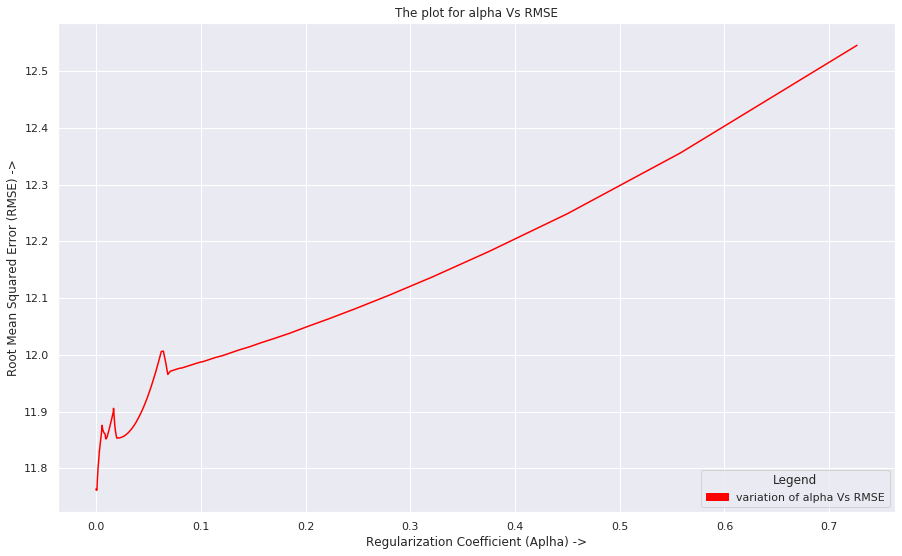

In [33]:
fig, ax = plt.subplots(figsize=(15,9))
ax.set_title('The plot for alpha Vs RMSE')

plt.plot([i[0] for i in aplha_vs_rmse], [i[1] for i in aplha_vs_rmse], color='red')

red_patch = mpatches.Patch(color='red', label='variation of alpha Vs RMSE')
plt.ylabel('Root Mean Squared Error (RMSE) ->')
plt.xlabel('Regularization Coefficient (Aplha) ->') 
plt.legend(handles=[red_patch],loc="lower right", title="Legend")
ax.grid(True)

plt.show()

#### References

1. Dripta Maharaj, (2020), Slides, availabe on web <a href="https://sites.google.com/view/da220-2019-20"> https://sites.google.com/view/da220-2019-20 </a>, last accessed on 6.2.2020.


2. Jeremy Jordan, (2017), Polynomial regression, availabe on web <a href="https://www.jeremyjordan.me/polynomial-regression/"> https://www.jeremyjordan.me/polynomial-regression/ </a>, last accessed on 6.2.2020.


3. Numpy Contributors, (2018), numpy.random.normal, Scipy.org, availabe on web <a href="https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html"> https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html </a>, last accessed on 6.2.2020.


4. Animesh Agarwal, (2018), Polynomial Regression, towardsdatascience.com, availabe on web <a href="https://towardsdatascience.com/polynomial-regression-bbe8b9d97491"> https://towardsdatascience.com/polynomial-regression-bbe8b9d97491 </a>, last accessed on 6.2.2020.


5. user:Kaggle, (2016), Difference between fit and fit_transform in scikit_learn models?, datascience.stackexchange.com, availabe on web <a href="https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models"> https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models </a>, last accessed on 6.2.2020.





#### Acknowledgements

* Dripta Maharaj